# Graph Representations
**Edge List**
List of all edges

**Adjacency Matrix**
Matrix. Entries 1 if there is an edge, 0 if there is not.

**Adjacency List**
For each vertex, a list of adjacent vertices.

# Density and Runtimes

__Algorithm Runtimes__
Graph algorithm runtimes depend on |V| and |E|


**Summary**
<table>
<thead>
<tr><th>Op.</th><th>Is Edge?</th><th>List Edge</th><th>List Nbrs.</th></tr>
</thead>
<tbody>
<tr><th>Adj. Matrix</th><th>Θ(1)</th><th>Θ(|V|^2)</th><th>Θ(|V|)</th></tr>
<tr><th>Edge List</th><th>Θ(|E|)</th><th>Θ(|E|)</th><th>Θ(|E|)</th></tr>
<tr><th>Adj. List</th><th>Θ(deg)</th><th>Θ(|E|)</th><th>Θ(deg)</th></tr>
</tbody>
</table>

Which is faster, O(|V|<sup>(3/2)</sup>) or $O(|E|)$? Depends on the density, namely how many edges you have in terms of the number of vertices.

__Dense Graphs__ In dense graphs |E| ≈ |V|<sup>2</sup>.

__Sparse Graphs__ In sparse graphs |E| ≈ |V|.

# WEEK 1

## Exploring Graphs


__Reachability__
__Input__: Graph G and vertex s

__Output__: The collection of vertices v of G so that there is a path from s to v

**Pseudocode**
```Python
Component(s)
    DiscoveredNodes ← {s}
    while there is an edge e leaving DiscoveredNodes that has not been explored:
        add vertex at other end of e to DiscoveredNodes
    return DiscoveredNodes
```
__Q:__ Which nodes are reachable from A?
<div> <img src="attachment:image.png"  width="300"/> </div>

__A:__ A,F,I,H,C,D

__Explore__

Given each vertex boolean visited(v). We can explore in many ways, the following is ___DFS___ explore.

**Pseudocode**
```Python
Explore(v)
    visited(v) ← true
    for (v, w) ∈ E:
        if not visited(w):
            Explore(w) # recursively explore the neighbors
```

__Runtime__: O(|V|+|E|)

## Connectivity

__Connected Components__

__Theorem__
The vertices of a graph G can be partitioned into Connected Components so that v is reachable from w if and only if they are in the same connected component.

__Algorithm__
* Explore(v) finds the connected component of v. Just need to repeat to find other components.
* Modify DFS to do this.
* Modify goal to label connected components.

**Pseudocode**
```Python
Explore(v)
    visited(v) ← true
    CCnum(v) ← cc
    for (v, w) ∈ E:
        if not visited(w):
            Explore(w)
DFS(G)
    for all v ∈ V :
        mark v unvisited
    cc ← 1
    for v ∈ V :
        if not visited(v):
            Explore(v)
            cc ← cc + 1
```

## Exercises: Graph Representation

In this course exercises the graphs will be represented as following:

The first line-> nodes, edges and the following lines -> 2 vertices corr. to an edge in G

<div> 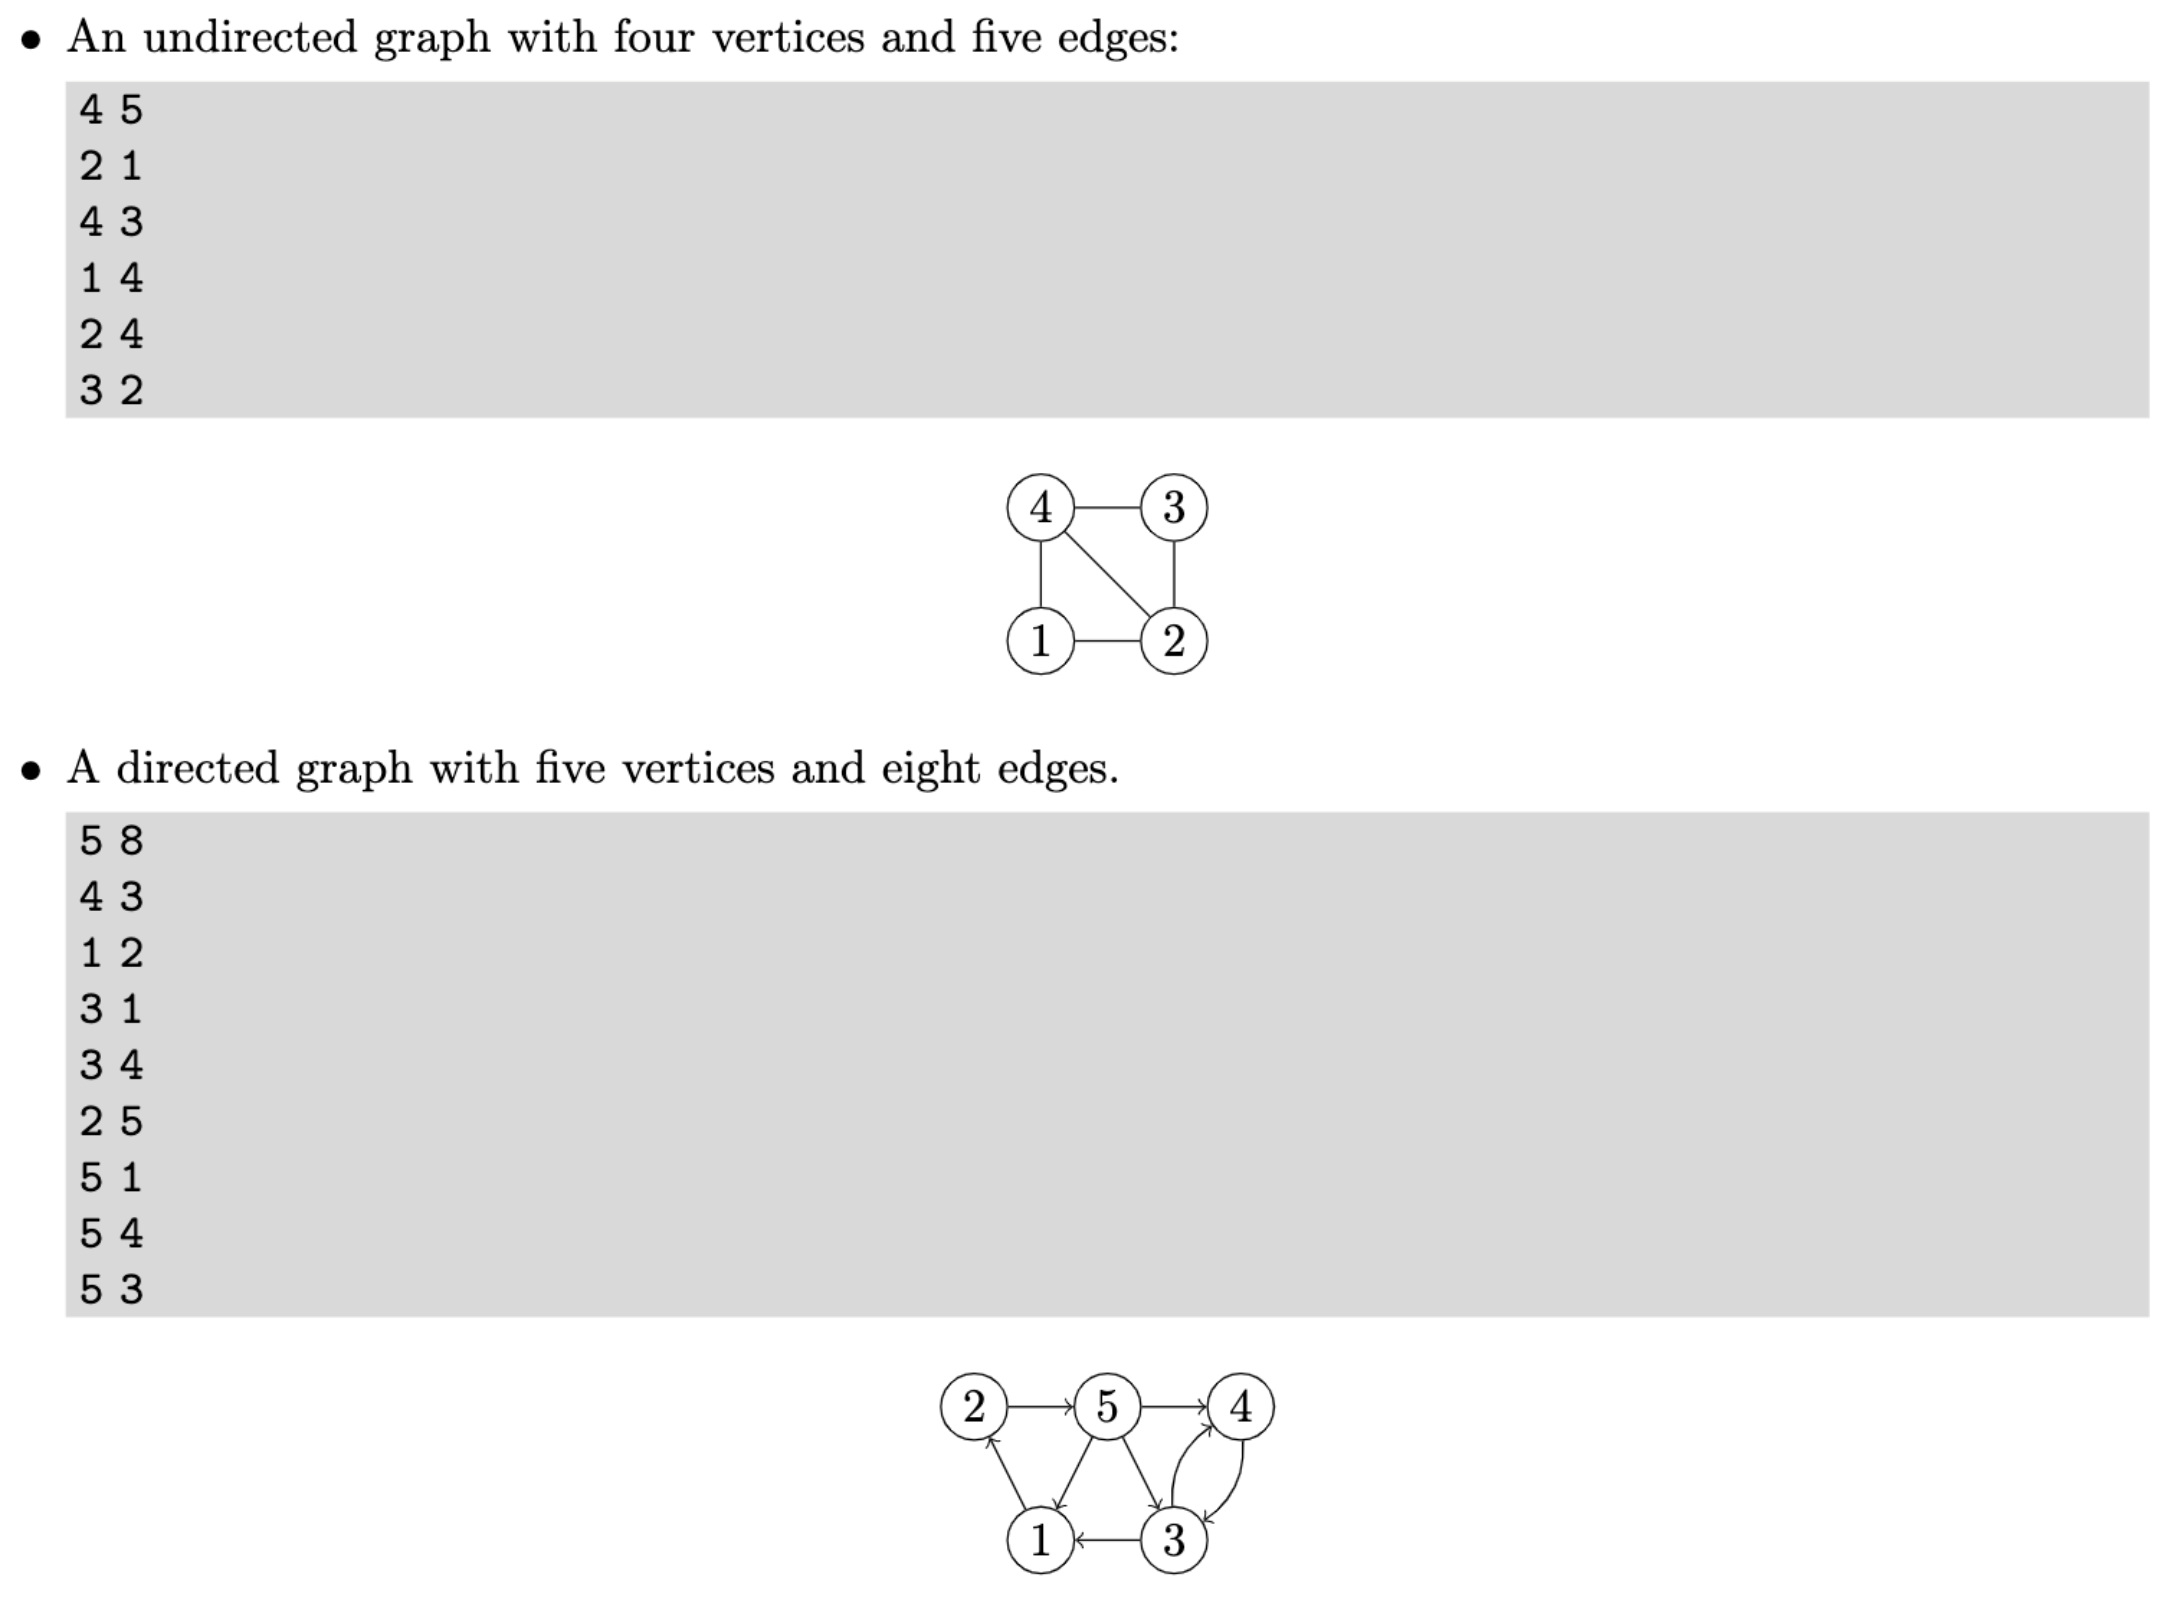 </div>
<div> 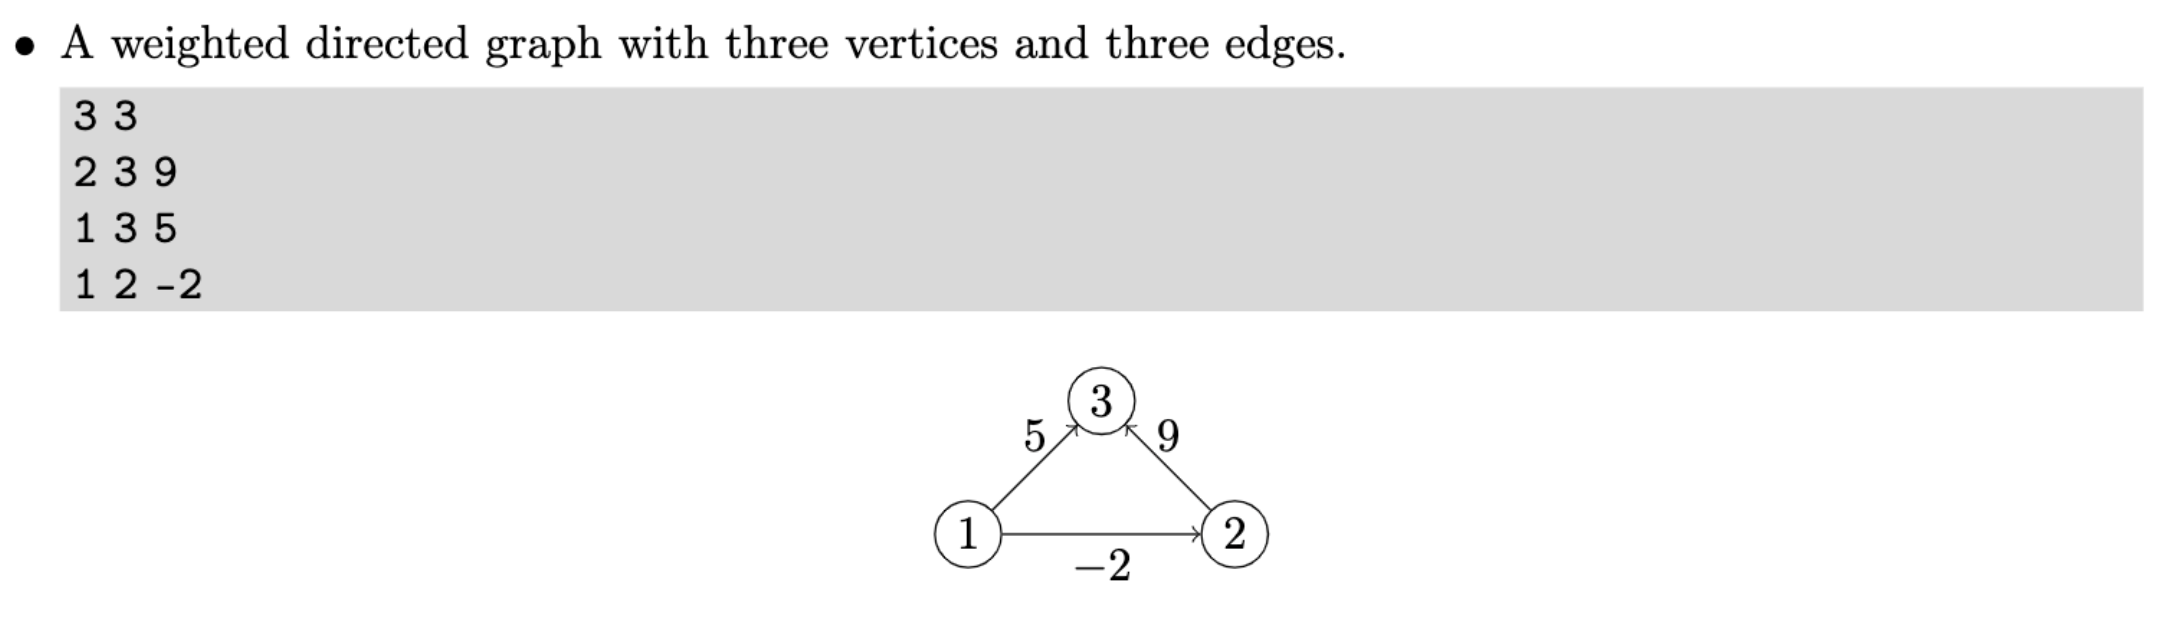 </div>

## Exercise 1

__Prob__ Finding an exit from maze

(__NOTE__ We need adjacency list implementation for this)

In [1]:
class Graph:
    def __init__(self, num_vertices):
        '''initiates graph with number of vertices = num_vertices'''
        self.num_vertices = num_vertices
        self.adj_list = [[] for i in range(num_vertices)]
        
    def add_edge(self, i, j):
        '''add edge between i-th and j-th node'''
        self.adj_list[i].append(j)
        self.adj_list[j].append(i)
    
    @staticmethod # static methods do not require self or cls as an argument. Just like regular function except...
                  # .... we are including them in static method as they have some logical connection to the class
    def explore(adj_list, node, visited):
        visited[node] = 1 # Mark the current node True in the visited
        for neighbor in adj_list[node]: # iterate over all 'neighbor's of 'node'
            if not visited[neighbor]:
                Graph.explore(adj_list, neighbor, visited) # Note how to use recursion on staticmethods
        
    def is_connected(self, i, j):
        visited = [0]*self.num_vertices # initialize the list that keeps track of visited nodes
        Graph.explore(self.adj_list, i, visited)   # or explore j
        return visited[j]     

In [4]:
G = Graph(6)

G.add_edge(0, 1)
G.add_edge(1, 4)
G.add_edge(2, 3)
G.add_edge(3, 5)
# G.add_edge(4, 5)

In [5]:
G.is_connected(2,4)

0

Implementation with 'adjacency dictionaries'-> __key__-> node num, __value__-> set of vertices (neighbors)

In [ ]:
#Uses python3

import sys

def explore(adj, node, visited):
    visited[node] = 1 # Mark the current node True in the visited
    for neighbor in adj[node]: # iterate over all 'neighbor's of 'node'
        if not visited[neighbor]:
            explore(adj, neighbor, visited) # Note how to use recursion on staticmethods
            
def reach(adj, x, y):
    #write your code here
    visited = [0]*len(adj) # initialize the list that keeps track of visited nodes
    explore(adj, i, visited)   # or explore j
    return visited[j]  
    

if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n, m = data[0:2]
    data = data[2:]
    edges = list(zip(data[0:(2 * m):2], data[1:(2 * m):2]))
    x, y = data[2 * m:]
    adj = [[] for _ in range(n)]
    x, y = x - 1, y - 1
    for (a, b) in edges:
        adj[a - 1].append(b - 1)
        adj[b - 1].append(a - 1)
    print(reach(adj, x, y))

**What is the guarantee that our explore function will find a the path from $i$ to $j$ if it exists**

**Proof**: Say, $\exists$ a path but we do not explore upto j, we only explore upto w. But if w is explored by definition all its neighbors will also be explored if not already explored. The neighbor of neighbor of w will also be explored in the same way....going on we are guaranteed to explore j which is _a neighbor of a neighbor of a neighbor of a neighbor...._

## Exercise 2

__Prob__: Find number of connected components in a Graph e.g. there are 4 connected elements in this graph
<div> 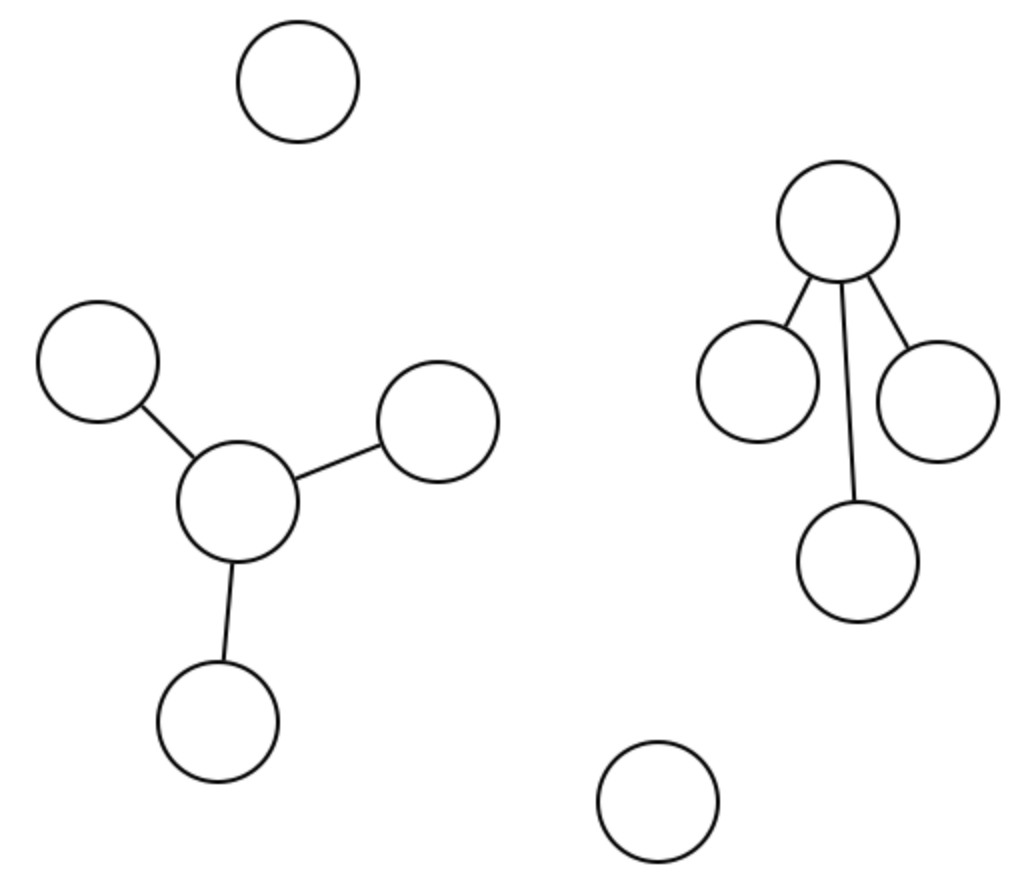 </div>

In [ ]:
def number_of_components(adj):
    count = 0
    visited = [0] * len(adj)
    for i in range(len(adj)):
        if not visited[i]:
            explore(adj, i, visited)
            count += 1 # explore stops when all elements connected to i are explored, then increment count by 1
    return result

def explore(adj, node, visited):
    visited[node] = 1
    for neighbor in adj[node]:
        if not visited[neighbor]:
            explore(adj, neighbor, visited)

if __name__ == '__main__':
    n, m = map(int, raw_input().split())
    adj = [[] for _ in range(n)]
    for i in range(m):
        a, b = map(int, raw_input().split())
        # adjacency list
        adj[a - 1].append(b - 1)
        adj[b - 1].append(a - 1)
    print(number_of_components(adj))

# WEEK 2

## Directed Acyclic Graphs


1. __Directed Graphs__

__Definition__: A directed graph is a graph where each edge has a start vertex and an end vertex.

2. __Directed DFS__
* Only follow directed edges.
* explore(v) finds all vertices reachable from v.
* Can still compute pre- and post- orderings.

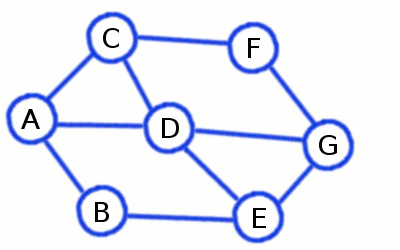

3. __Cycles__

__Definition__
A cycle in a graph G is a sequence of vertices v1, v2, ..., vn so that (v1, v2), (v2, v3), ... , (vn-1, vn), (vn, v1) are all edges.

__Theorem__
If G contains a cycle, it cannot be linearly ordered.

4. __DAGs__

__Definition__ A directed graph G is a Directed Acyclic Graph (or DAG) if it has no cycles.

__Note__: For `DFS`/ `explore` in DAG's, nothing in the code will change from that in Undirected Graphs. Just the adjacency lists/matrices will behave differently. So, the only change we need to make is in the adjacency list definition in the `class Graph`

## Depth First Search in case of Directed Graphs

We will start from a node, explore different paths from that node until 

1. We find what we are looking for.
2. We hit a dead end- then we start back-tracking our path until we find an alternative path. In other words, we backtrack or retreat only if there is no other way forward.

For convenience, let's look at the path like this: A path has 2 types of nodes- 
1. Starting from which one can move forward to an unexplored path (possibly get a cycle in doing so)- say __Active Node__
2. Starting from which cannot move forward to an unexplored path or we are guaranteed to hit a dead end say __Dead Node__

The path_stack list/ stack will contain all the active nodes in the current path.

In [57]:
'''Without Recursion, using stack'''
def depth_first_search(graph):
    visited, stack = set(), [root]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

'''With Recursion'''
def depth_first_search_recursive(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in graph[start] - visited:
        depth_first_search_recursive(graph, next, visited)
    return visited

__DFS__ to print path traversed

## Exercise 2.1

__Prob__: Checking Consistency in CS curriculam -> Find acyclicity of graphs.

__Sol__: If we start from a node, explore different paths from that node, and come back to the same node along some path; then we have found a cycle. While exploring a path if we hit a dead end, we start back-tracking our path until we find an alternative path. In other words, we backtrack or go back to a visited node iff there is no other way we can explore.

In [9]:
class Graph:
    def __init__(self, num_vertices):
        '''initiates graph with number of vertices = num_vertices'''
        self.num_vertices = num_vertices
        self.adj_list = [[] for i in range(num_vertices)]
        
    def add_edge(self, i, j):
        '''add edge between i-th and j-th node'''
        self.adj_list[i].append(j)

<div> 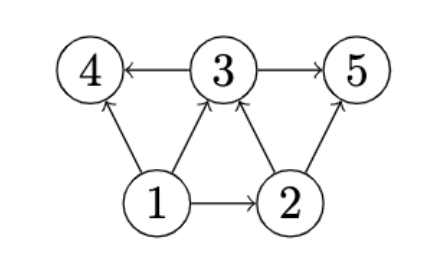 </div>

In [15]:
G = Graph(5)

G.add_edge(0,1) 
G.add_edge(1,2) 
G.add_edge(0,2) 
G.add_edge(2,3) 
G.add_edge(3,0) 
G.add_edge(1,4) 
G.add_edge(2,4)

In [16]:
G.adj_list

[[1, 2], [2, 4], [3, 4], [0], []]

In [10]:
def dfs(G, curr_node, visited, path_stack):
    '''INPUT: Graph G, current node-> curr_node, visited-> list of already visited nodes, 
    path_stack-> a list(stack) that keeps track of the nodes in the current path
    
    Stops and Returns 1 if we find a cycle. Else, move forward if possible, if not, retreat until 
    there is a way forward.'''
    visited[curr_node] = 1
    path_stack[curr_node] = 1
    
    for neighbor in G.adj_list[curr_node]:
        if path_stack[neighbor]: # base-case
            return 1
        if not visited[neighbor] and dfs(G, neighbor, visited, path_stack):
            return 1
    path_stack[curr_node] = 0 # remove the vertex from recursion stack
    return 0

In [11]:
def isCyclic(G):
    # Initiate all the nodes as not visited and not part of path stack
    visited = [0 for _ in range(G.num_vertices)]
    path_stack = [0 for _ in range(G.num_vertices)]
    # Call the recursive helper function to detect cycle in different DFS trees
    for start_node in range(G.num_vertices):
        if not visited[start_node] and dfs(G, start_node, visited, path_stack):
            return 1
    return 0

In [17]:
isCyclic(G)

1

# WEEK 3

## Breadth-First Search

__Implementation and Analysis__

**DFS $\rightarrow$ Stacks & BFS $\rightarrow$ Queues**

```python
BFS(G, S)
  for all u ∈ V:
    dist[u] ← ∞ // you can assign infinity to number of nodes + 1 or number of edges + 1
  dist[S] ← 0
  Q ← {S} {queue containing just S}
  while Q is not empty:
    u ← Dequeue(Q)
    for all (u, v) ∈ E:
      if dist[v] = ∞:
        Enqueue(Q, v)
        dist[v] ← dist[u] + 1
```

Note : The efficient way to implement for all (u, v) ∈ E is go through the adjacency list of vertex u.

1. Running time
Lemma
The running time of breadth-first search is O(|E| + |V|).

Proof

Each vertex is enqueued at most once.
Each edge is examined eith once (for directed graphs) or twice (for undirected graphs).
### Proof of Correctness
1. Reachability

__Definition__
Node u is reachable from node S if there is a path from S to u.

__Lemma__
Reachable nodes are discovered at some point, so they get a finite distance estimate from the source. Unreachable nodes are not discovered at any point, and the distance to them stays infinite.

3. Order Lemma

__Lemma__
By the time node u at distance d from S is dequeued, all the nodes at distance at most d have already been discovered (enqueued).

4. Correct distances

__Lemma__
When node u is discovered (enqueued), dist[u] is assigned exactly d(S, u).

5. Queue property

__Lemma__
At any moment, if the first node in the queue is at distance d from S, then all the nodes in the queue are either at distance d from S or at distance d+1 from S. All the nodes in the queue at distance d go before (if any) all the nodes at distance d+1.



### Shortest-path tree
__Lemma__
Shortest-path tree in indeed a tree, i.e. it doesn't contain cycles (it is a connected component by construction).

Constructing shortest-path tree
```python
BFS(G, S)
  for all u ∈ V:
    dist[u] ← ∞, prev[u] ← nil
  dist[S] ← 0
  Q ← {S} {queue containing just S}
  while Q is not empty:
    u ← Dequeue(Q)
    for all (u, v) ∈ E:
      if dist[v] = ∞:
        Enqueue(Q, v)
        dist[v] ← dist[u] + 1, prev[v] ← u
```        

### Reconstructing Shortest Path
```python
ReconstructPath(S, u, prev)
  result ← empty
  while u ̸= S:
    result.append(u)
    u ← prev[u]
  return Reverse(result)
```

## Exercise 3.1

__Prob__: Given an _undirected graph_ with m edges, n vertices and given its 2 vertices u,v; find the shortest path b/w _u_, _v_

In [17]:
def bfs_shortest_distance(G, u, v, inf = 10**6):
    '''Given undirected graph G with unweighted edges, Returns shortest distance b/w two nodes u & v
    Returns -1 if there is no path'''
    
    dist = [inf]*G.num_vertices # or [math.inf]*G.num_vertices -> array containing distance from u
    dist[u] = 0          # distance of u from itself is 0
    
    queue = [u]          # initiate the queue with only processed nodes (currently u) in it.
    
    while queue:  # or while inf not in dist i.e. all nodes are found/ processed
        s = queue.pop(0) # Dequeue 
        for next_ in G.adj_list[s]:
            if dist[next_] == 10**6: # node is unprocessed
                queue.append(next_)
                dist[next_] = dist[s]+1
                if next_ == v: return dist[next_]
    return -1

In [18]:
class Graph:
    def __init__(self, num_vertices):
        '''initiates graph with number of vertices = num_vertices'''
        self.num_vertices = num_vertices
        self.adj_list = [[] for i in range(num_vertices)]
        
    def add_edge(self, i, j):
        '''add edge between i-th and j-th node'''
        self.adj_list[i].append(j)        
        self.adj_list[j].append(i)

In [24]:
G = Graph(6)

G.add_edge(0,1) 
G.add_edge(1,2) 
G.add_edge(5,2) 
G.add_edge(0,3) 
G.add_edge(1,4) 
G.add_edge(5,4) 

In [ ]:
bfs_shortest_distance(G, 0, 5)

## Exercise 3.2

__Prob__: Given an _undirected graph_ with m edges, n vertices return if the graph is bipartite

In [31]:
def isBipartite(G):
    color = [-1]*G.num_vertices
    color[0] = 0
    
    queue = [0]          # initiate the queue with only processed nodes (currently u) in it.
    
    while queue:
        s = queue.pop(0) # Dequeue 
        for next_ in G.adj_list[s]:
            if color[next_] == -1: 
                color[next_] = (color[s]+1)%2
                queue.append(next_)
            elif color[next_] != (color[s]+1)%2:
                print(list(enumerate(color)))
                return 0
    print(list(enumerate(color)))
    return 1

In [32]:
isBipartite(G)

[(0, 0), (1, 0), (2, 0), (3, 1), (4, 1), (5, -1)]


0

In [30]:
G = Graph(6)

G.add_edge(0,3) 
G.add_edge(1,4) 
G.add_edge(1,3) 
G.add_edge(2,3)
G.add_edge(2,1)

# WEEK 4

## Fastest Route


What is the fastest route to get home from work?

### Naive Algorithm

__Observation__ Any subpath of an optimal path is also optimal.

__Edge Relaxation__ 

dist[v] will be an upper bound on the actual distance from S to v. The edge relaxation procedure for an edge (u, v) just checks whether going from S to v through u improves the current value of dist[v].

```
Relax((u, v) ∈ E)
  if dist[v] > dist[u] + w(u, v):
    dist[v] ← dist[u] + w(u, v)
    prev[v] ← u
```
Naive Approach
```
Naive(G, S)
  for all u ∈ V :
    dist[u] ← ∞
    prev[u] ← nil
  dist[S] ← 0
  do:
    relax all the edges
  while at least one dist changes
```

__Lemma__ After the call to Naive algorithm, all the distances are set correctly.

### Dijkstra's Algorithm: Implementation
Pseudocode
```Python
def Dijkstra(Graph, source):
    dist[source]  := 0                     # Distance from source to source is set to 0
    for each vertex v in Graph:            # Initializations
        if v ≠ source
           dist[v]  := infinity   # Unknown distance function from source to each node set to infinity
        add v to Q                         # All nodes initially in Q

    while Q is not empty:                   # The main loop
        v := vertex in Q with min dist[v]   # In the first run-through, this vertex is the source node
    remove v from Q 

    for each neighbor u of v:           # where neighbor u has not yet been removed from Q.
        alt := dist[v] + length(v, u)
        if alt < dist[u]:               # A shorter path to u has been found
            dist[u]  := alt             # Update distance of u 

    return dist[]
```
`ExtractMin(H)`: Find the vertex in H with the minimum dist-value, remove it from H and return this vertex.

### Dijkstra's Algorithm: Running Time
Total running time: $T(MakeqQueue) + |V|．T(ExtractMin) + |E|．T(ChangePriority)$

Priority queue implementations:
* array: $O(|V| + |V|^2 + |E|) = O(|V|^2)$
* binary heap: $O(|V| + |V|log|V| + |E|log|V|) = O((|V| + |E|)log|V|)$

## Exercise 4.1

__Prob__ Given a directed graph with positive weighted edges and 2 vertices, Find the shortest distance

In [2]:
class Graph:
    def __init__(self, num_vertices):
        '''initiates graph with number of vertices = num_vertices'''
        self.num_vertices = num_vertices
        self.adj_list = [[] for i in range(num_vertices)]
        
    def add_edge(self, i, j, w):
        '''add edge from i-th to j-th node'''
        self.adj_list[i].append((j, w))
        

In [3]:
G = Graph(5)

G.add_edge(0,1,1) 
G.add_edge(1,2,1) 
G.add_edge(0,2,5) 
G.add_edge(3,0,2)
G.add_edge(2,4,1) 
G.add_edge(3,4,9) 
G.add_edge(*(1,4,3))

# G.add_edge(1,4) 
# G.add_edge(1,4) 
# G.add_edge(5,4) 

In [4]:
G.adj_list

[[(1, 1), (2, 5)], [(2, 1), (4, 3)], [(4, 1)], [(0, 2), (4, 9)], []]

__Array based implementation of Dijkstra__

In [6]:
import math

def dijkstra(G, s, f, inf=math.inf):
    dist = {i:inf for i in range(G.num_vertices)} 
    dist[s] = 0                       # Distance from source to source is set to 0
    unprocessed = set(dist)           # Initialize the set of processed nodes (for which shortest distance is found)
    
    while unprocessed:
        u = min(unprocessed, key=lambda x: dist[x])   # we have found the minimum dist of u from s
        unprocessed.remove(u)              # add u to processed nodes
        
        if u==f: return -1 if dist[u]==inf else dist[u]
        
        for v,w in G.adj_list[u]:
            if dist[v] > dist[u]+w: dist[v] = dist[u]+w
            
    return -1 if dist[f]==inf else dist[f]

In [9]:
dijkstra(G, 0,4)

3

## Currency Exchange


__Problem__
You can convert some currencies into some others with given exchange rates. What is the max amount in Russian rubles you can get from 1000 US dollars using unlimited number of currency conversions? Is it possible to get as many Russian rubles as you want? Is it possible to get as many US dollars as you want?

Maximum product over paths

__Input__: 
Currency exchange graph with weighted directed edges ei between some pairs of currencies with weights rei corresponding to the exchange rate.
__Output__: Maximize $\prod_{j=1}^{k} r_{e_j} = r_{e_1} r_{e_2}...r_{e_k} $ over paths $(e_1, e_2, . . . , e_k)$ from USD to RUR in the graph.

### Currency Exchange: Reduction to Shortest Paths
Reduction to shortest paths

Use two standard approaches:
* Replace product with sum by taking logarithms of weights
* Negate weights to solve minimization instead of maximization

Taking the Logarithm

$xy = 2^{log2(x)}\times2^{log2(y)} = 2^{log2(x)+log2(y)}$

$xy → max ⇔ log_2(x) + log_2(y) → max$

## Bellman-Ford Algorithm


```
for v in V:
    v.distance = infinity
    v.p = None
source.distance = 0
for i from 1 to |V| - 1:
    for (u, v) in E:
        relax(u, v)
        
relax(u, v):
    if v.distance > u.distance + weight(u, v):
        v.distance = u.distance + weight(u, v)
        v.p = u
```
### Running Time
__Lemma__ The running time of Bellman–Ford algorithm is O(|V||E|).

### Bellman-Ford Algorithm: Proof of Correctness

__Lemma__ After k iterations of relaxations, for any node u, dist[u] is the smallest length of a path from S to u that contains at most k edges.

__Corollary__ In a graph without negative weight cycles, Bellman–Ford algorithm correctly finds all distances from the starting node S.

__Corollary__ If there is no negative weight cycle reachable from S such that u is reachable from this negative weight cycle, Bellman–Ford algorithm correctly finds dist[u] = d(S, u).

### Negative weight cycles
__Lemma__ A graph G contains a negative weight cycle if and only if $|V|$-th (additional) iteration of `BellmanFord(G,S)` updates some dist-value.

__Finding Negative Cycle__

__Algorithm__:

* Run |V| iterations of Bellman–Ford algorithm, 
* save node v relaxed on the last iteration. v is reachable from a negative cycle
* Start from x ← v, follow the link x ← prev[x] for |V| times — will be definitely on the cycle
* Save y ← x and go x ← prev[x] until x = y again

### Infinite Arbitrage
Detect Infinite Arbitrage

__Lemma__ It is possible to get any amount of currency u from currency S if and only if u is reachable from some node w for which dist[w] decreased on iteration V of Bellman-Ford.

__Detect Infinite Arbitrage__

* Do |V | iterations of Bellman–Ford, 
* save all nodes relaxed on V -th iteration — set A
* Put all nodes from A in queue Q
* Do breadth-first search with queue Q and find all nodes reachable from A
* All those nodes and only those can have infinite arbitrage
* Reconstruct Infinite Arbitrage
* During Breadth-First Search, remember the parent of each visited node
* Reconstruct the path to u from some node w relaxed on iteration V
* Go back from w to find negative cycle from which w is reachable
* Use this negative cycle to achieve infinite arbitrage from S to u

## Exercise 4.2

__Prob__ Given an directed graph with possibly negative edges, check whether it contains a negative weight cycle.

__Sol__ Bellman Ford for |V| iterations:- If updated in the last iteration -> then negative cycle.

In [3]:
def negative_cycle(G, inf=10**6):
    dist = [inf]*G.num_vertices
    dist[0] = 0 # arbitrarily select 0 as the starting node
    
    for i in range(G.num_vertices): # |V| iterations
        for u in range(G.num_vertices):
            for v,w in G.adj_list[u]:
                if dist[v] > dist[u]+w: # Relax (u,v)
                    dist[v]=dist[u]+w 
                    if i == G.num_vertices-1: # if relaxation happens in the |V|-th iteration
                        return 1              # Contains -ve cycle
    return 0   

In [6]:
G = Graph(5)

G.add_edge(0,1,-1) 
G.add_edge(1,2,2) 
G.add_edge(2,0,1) 
G.add_edge(3,0,2)
# G.add_edge(2,4,1) 
# G.add_edge(3,4,9) 
# G.add_edge(1,4,3)

In [7]:
negative_cycle(G)

0

# WEEK 5

## Minimum Spanning Trees

### Building a Network
__Minimum spanning tree (MST)__

__Input__: A connected, undirected graph G = (V , E) with positive edge weights. <br>
__Output__: A subset of edges E′ ⊆ E of minimum total weight such that the graph (V , E′) is connected.
Remark
The set E′ always forms a tree.

### Properties of Trees
* A tree is an undirected graph that is connected and acyclic.
* A tree on n vertices has n − 1 edges.
* Any connected undirected graph G(V , E) with |E| = |V| − 1 is a tree.
* An undirected graph is a tree iff there is a unique path between any pair of its vertices.

### Greedy Algorithms
#### Kruskal’s algorithm
repeatedly add the next lightest edge if this doesn’t produce a cycle

#### Prim’s algorithm
repeatedly attach a new vertex to the current tree by a lightest edge

### Cut property
Let a subset of edges X ⊆ E be a part of a MST of G(V, E), S ⊆ V be such that no edge of X crosses between S and V − S, and e ∈ E be a lightest edge across this partition. Then X + {e} is a part of some MST.

### Kruskal’s Algorithm
__Algorithm__: 
* repeatedly add to X the next lightest edge e that doesn’t produce a cycle
* At any point of time, the set X is a forest, that is, a collection of trees
* The next edge e connects two different trees—say, T1 and T2
* The edge e is the lightest between T1 and V − T1, hence adding e is safe

#### Implementation Details

* use disjoint sets data structure
* initially, each vertex lies in a separate set
* each set is the set of vertices of a connected component
* to check whether the current edge {u, v} produces a cycle, we check whether u and v belong to the same set

```
* Set an empty set A={} and F = E where E is the set of all edges.
* Choose an edge e in F of minimum weight, and check whether adding e to A creates a cycle.If it does, remove e from F. If it doesn't, move e from F to A

* If F={} stop and output the minimal spanning tree (V,A).
```

__Note__ To implement Kruskal's Algorithm we need __Disjoint-set Data Structure (Union-Find)__ ->
1. We cannot add an edge b/w two vertices in the same set as that would create a cycle. To know whether two vertices are in the same set, we use `Find`
2. Adding an edge from one disjoint set to another calls for `Union` operation.

https://www.youtube.com/watch?v=kaBX2s3pYO4&t=161s

In [68]:
'''First, let's consider each vertex as a separate disjoint set. 
We will store this information in an array data structure
Each value represents the parent node of the index node. -1 => It is the root node i.e. no parent.'''

num_vertices = 9
set_of_vertices = [-1]*num_vertices

'''A function to find the parent node of '''
def Find(u, set_of_vertices):
    
    while set_of_vertices[u] != -1:
        u = set_of_vertices[u]
    return u

'''A function to add an edge b/w 2 vertices u, v and thus connecting two disjoint set of vertices'''
def Union(u, v):
    global set_of_vertices
    root_u = Find(u, set_of_vertices) 
    root_v = Find(v, set_of_vertices) 
    
    # Check if the vertices u,v ∈ same disjoint set. If they do, adding edge u,v leads to a cycle
    if root_u != root_v:
        set_of_vertices[root_u] = root_v     # make root of v as a parent of root of u

In [69]:
Union(0, 8)
Union(7, 8)
Union(5, 7)
Union(1, 2)
Union(3, 4)
Union(2, 3)
# Union(1, 7)

In [70]:
set_of_vertices

[8, 2, 4, 4, -1, 8, -1, 8, -1]